In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
from tqdm.notebook import tqdm
import skimage.io
import albumentations as albu
import tensorflow as tf

In [10]:
img_dir = '/home/workspace/data/.train/.task153/data/train/'
test_dir = '/home/workspace/data/.train/.task153/data/test/'
df = pd.read_csv(img_dir+'train.csv',names=['file','tile','label'],sep=',',skiprows=1)
test_df = pd.read_csv(test_dir+'test.csv',names=['file','tile','label'],sep=',',skiprows=1)
#image_file_list = glob(task_dir+ '/**/*.tif', recursive=True)

In [11]:
normal_img_len = len(df[df['label'] == 0]['file'])
normal_df = df[df['label'] == 0]
normal_df.reset_index(inplace=True, drop=False)

crack_img_len = len(df[df['label'] == 1]['file'])
crack_df = df[df['label'] == 1]
crack_df.reset_index(inplace=True, drop=False)

print(f'normal image : {normal_img_len}')
print(f'crack image : {crack_img_len}')

normal image : 12579
crack image : 1494


In [12]:
"""
    sz : 타일의 사이즈
    N : 타일의 갯수
    SZ * 루트N = 이미지 사이즈이어야 함
    ex) 17 * 4 = 68(이미지 사이즈)

"""
sz = 4
N = 17*17

def tile(img):
    result = []
    shape = img.shape
    pad0,pad1 = (sz - shape[0]%sz)%sz, (sz - shape[1]%sz)%sz
    img = np.pad(img,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2],[0,0]],
                constant_values=255)
    img = img.reshape(img.shape[0]//sz,sz,img.shape[1]//sz,sz,3)
    img = img.transpose(0,2,1,3,4).reshape(-1,sz,sz,3)
    if len(img) < N:
        img = np.pad(img,[[0,N-len(img)],[0,0],[0,0],[0,0]],constant_values=255)
#     idxs = np.argsort(img.reshape(img.shape[0],-1).sum(-1))[:N]
#     img = img[idxs]
    for i in range(len(img)):
        result.append({'img':img[i], 'idx':i})
    return result

def check_black(img):

    gray_image = img.copy()
#     gray_image = gray_image.astype(np.int8)
    gray_ravel = gray_image.ravel()
    # plt.hist(gray_ravel, 256, [0,255], color='black')
    # plt.show()

    up = 0
    down = 0
    for val in gray_ravel:
        if val <= 50:
            down += 1
        else:
            up += 1
    # print(up, down)
    
    #검은영역이 더 많을 경우 영역 제거 - 255로 변환
    if up <= down:
        thresholds = (gray_image[:,:] <= 50)

        gray_image[thresholds] = 254
        img = gray_image
    
        # plt.imshow(gray_image)
        # plt.show()
        # non_255 = gray_ravel[gray_ravel != 255]
        # plt.hist(non_255, 256, [0,255], color='black')
        # plt.show()
    return img

def preprocessing(image):
    tmp_tiles = []
    #이미지 타일화 및 검은영역 하얀색으로 변환
    tiles = tile(image)
    for t in tiles:
        img,idx = t['img'],t['idx']
        tmp_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = check_black(tmp_img)
        tmp_tiles.append(img)

    # all_tile = np.hstack(tmp_tiles)
    # plt.imshow(all_tile)

    #이미지 다시 합치기
    for i in range(17):
        start = i*17
        comp_img_2 = tmp_tiles[start]
        for j in range(1,17):
            comp_img_2 = cv2.hconcat([comp_img_2,tmp_tiles[start + j]])
        if i == 0:
            comp_img = comp_img_2.copy()
        else:
            comp_img = cv2.vconcat([comp_img,comp_img_2])
    # plt.imshow(comp_img)
    # plt.show()
    
    #GRAY to RGB
    result_image = cv2.merge([comp_img,comp_img,comp_img])
    return result_image

In [13]:
# #test data trans
# test_dir =  '/home/workspace/data/.train/.task153/data/test/'
# save_dir = 'trans_test_data/'
# test_df = pd.read_csv(test_dir+'test.csv',names=['file','tile','label'],sep=',',skiprows=1)
# for i in tqdm(range(len(test_df))):
#     file_name = test_df['file'][i]
# #     print(img_dir + file_name)
#     img = skimage.io.MultiImage(img_dir + file_name)[0]
#     result_img = preprocessing(img)
#     cv2.imwrite(save_dir+str(i)+'.jpg', result_img)


In [14]:
# #train data trans
# img_dir = '/home/workspace/data/.train/.task153/data/train/'
# save_dir = 'trans_data/'
# for i in tqdm(range(len(df))):
#     file_name = df['file'][i]
# #     print(img_dir + file_name)
#     img = skimage.io.MultiImage(img_dir + file_name)[0]
#     result_img = preprocessing(img)
#     cv2.imwrite(save_dir+str(i)+'.jpg', result_img)

    

In [15]:
crack_df

,index,file,tile,label
0,11,11.tif,8925m,1
1,16,16.tif,1613pm,1
2,20,20.tif,9413m,1
3,21,21.tif,2353m,1
4,23,23.tif,3292m,1
...,...,...,...,...
1489,14010,14010.tif,9244m,1
1490,14034,14034.tif,8093m,1
1491,14053,14053.tif,8806m,1
1492,14066,14066.tif,9413m,1


In [16]:
img_dir+img_name

NameError: name 'img_name' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


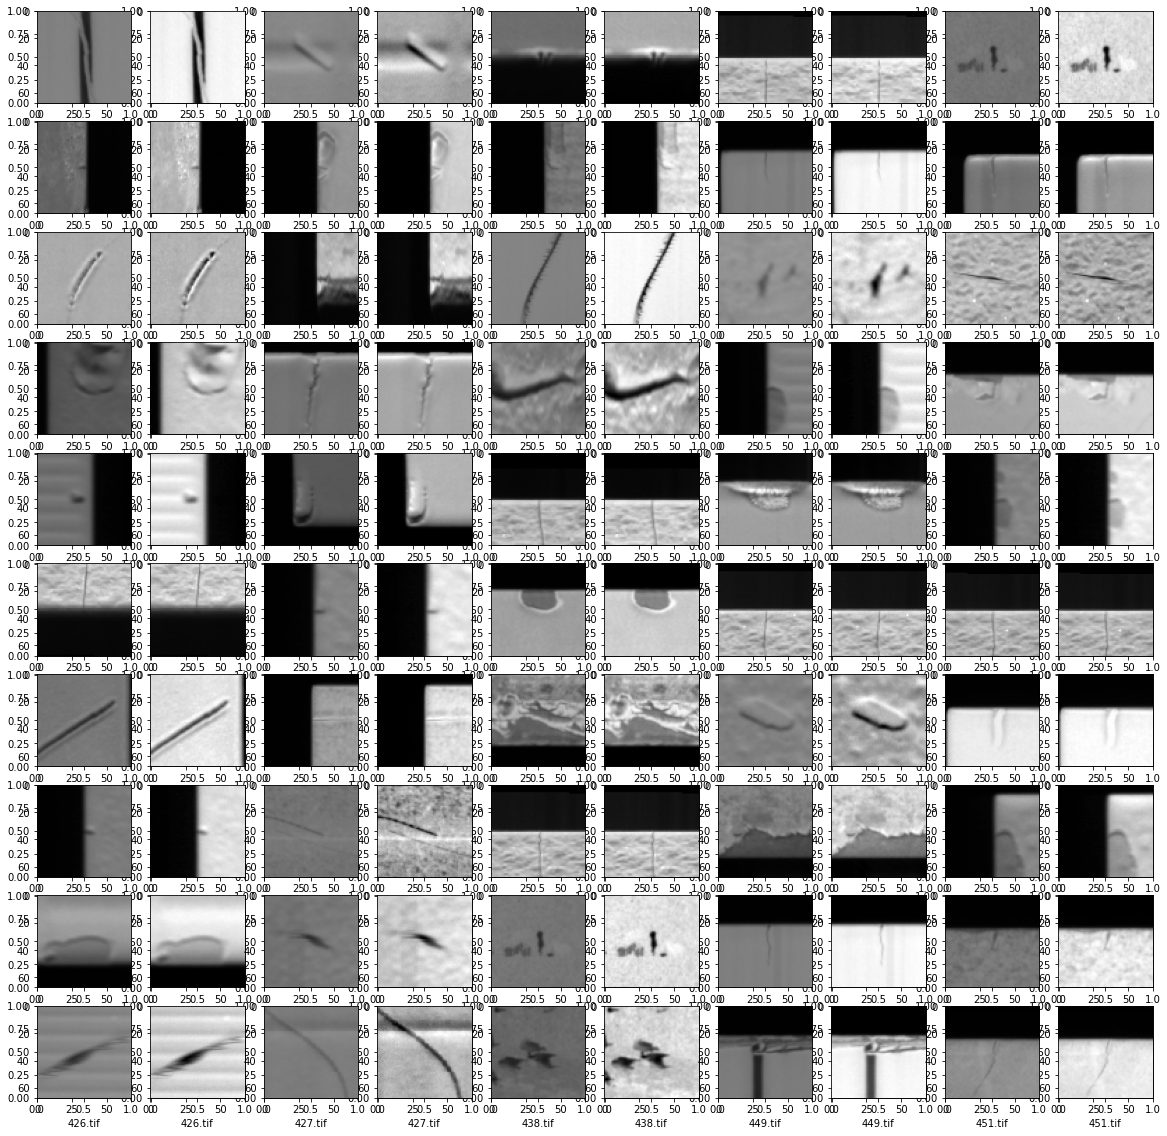

In [27]:
#크랙 타일
rows = 10
cols = 10
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
# fig.tight_layout()
i = 1
 
for index in range(50):
    img_name = crack_df['file'][index]
    img = skimage.io.MultiImage(img_dir+img_name)[0]
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img, aspect="auto")
    ax.set_xlabel(img_name)
#     ax.set_xticks([]), ax.set_yticks([])
    i += 1
#     median = cv2.medianBlur(img, 3)
    img_blur = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img_blur, aspect="auto")
    ax.set_xlabel(img_name)
    i += 1
plt.show()

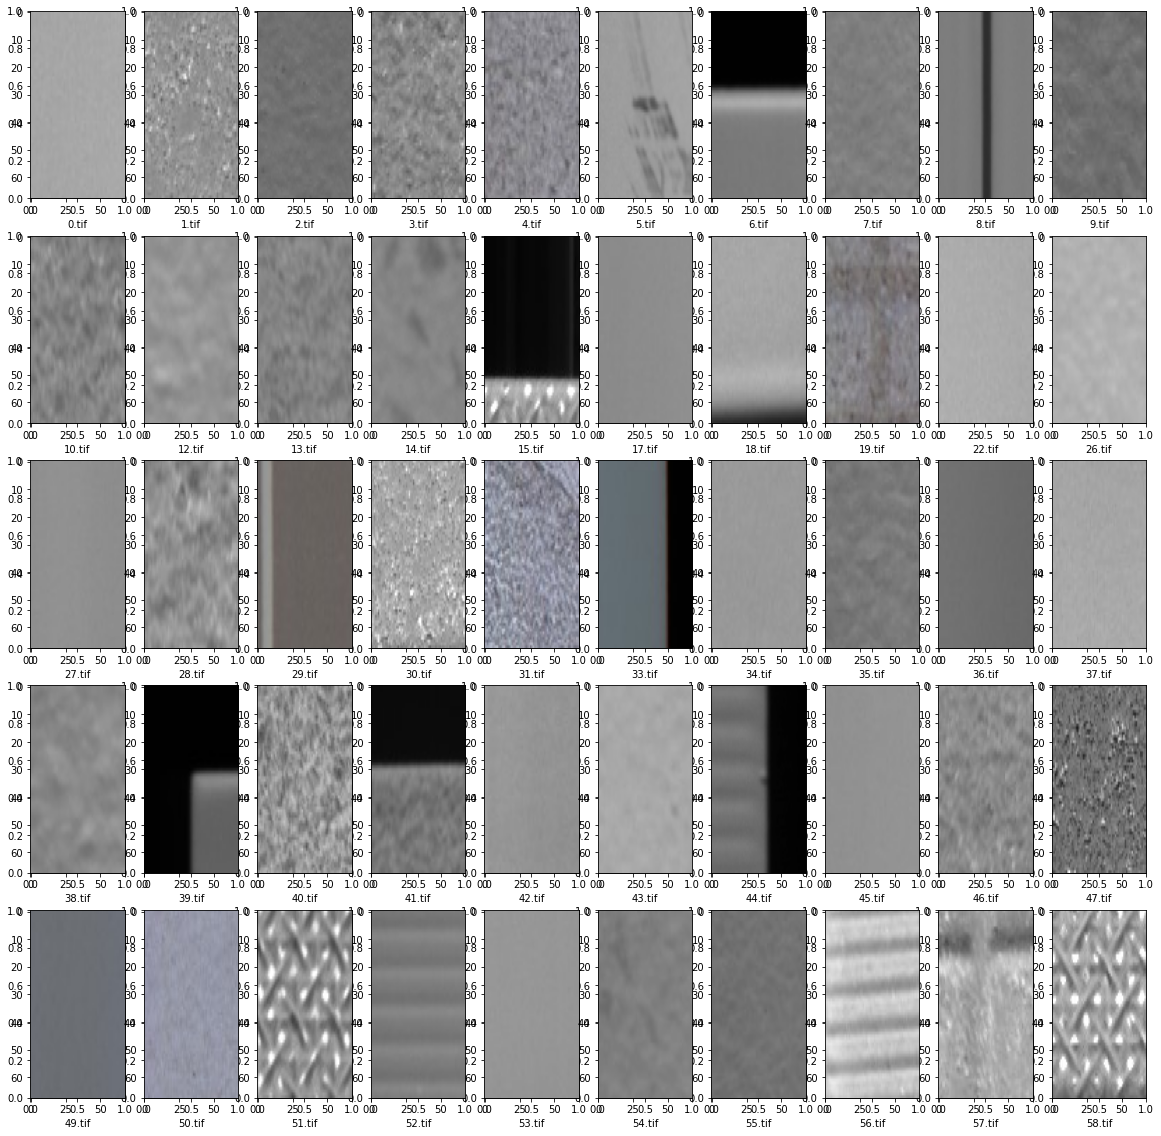

In [19]:
# 정상 타일
i = 1
rows = 5
cols = 10
fig2, axes2 = plt.subplots(rows, cols, figsize=(20, 20))
for index in range(50):
    img_name = normal_df['file'][index]
    img = skimage.io.MultiImage(img_dir+img_name)[0]
    ax = fig2.add_subplot(rows, cols, i)
    ax.imshow(img, aspect="auto")
    ax.set_xlabel(img_name)
#     ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.show()

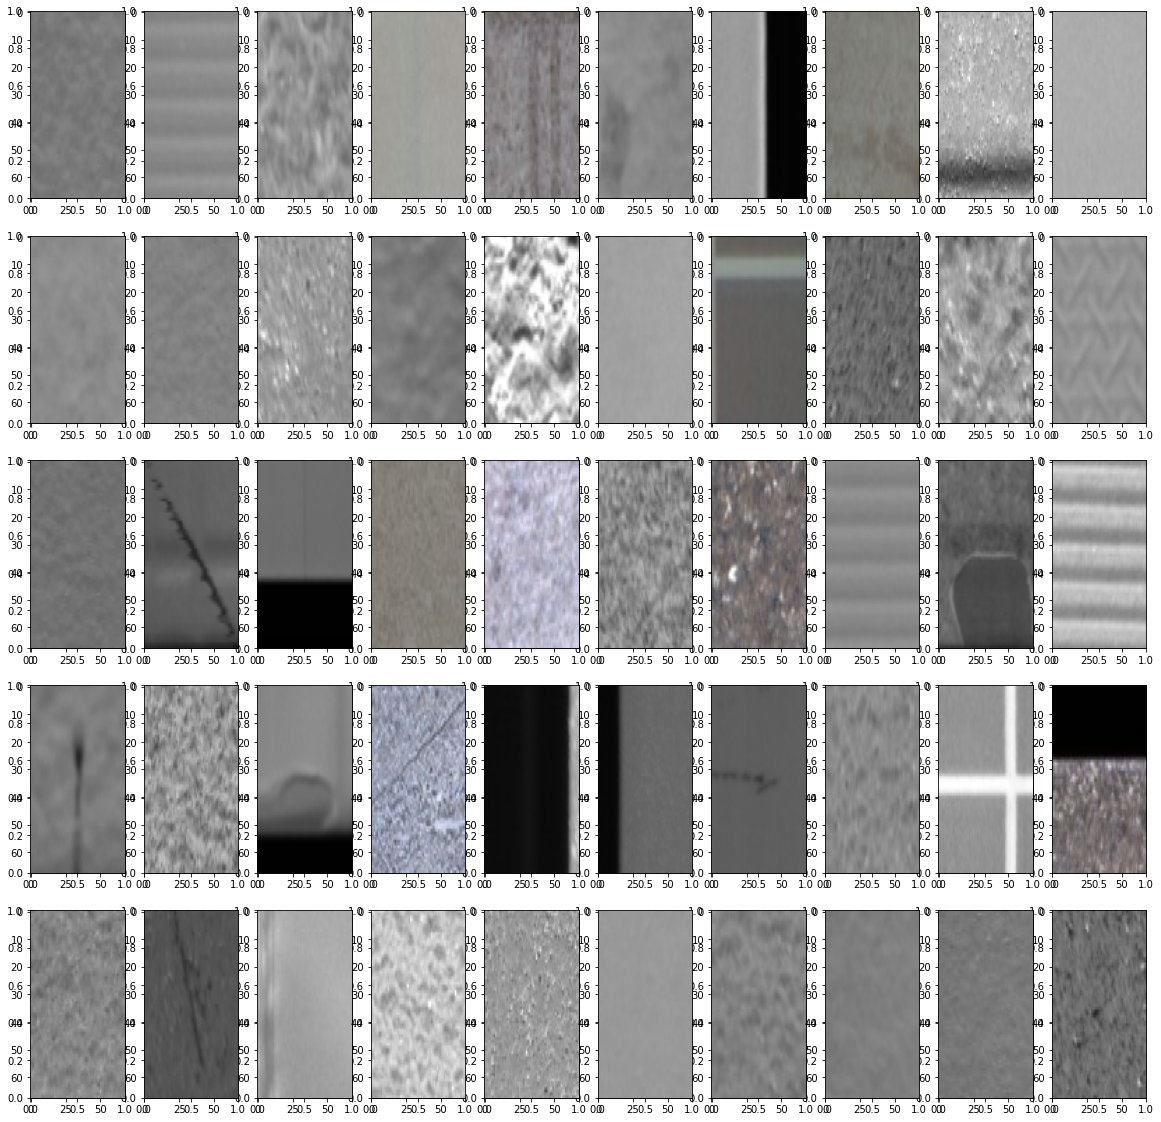

In [18]:
# 테스트 파일 타일
i = 1
rows = 5
cols = 10
fig2, axes2 = plt.subplots(rows, cols, figsize=(20, 20))
for index in range(50):
    img_name = test_df['file'][index]
    img = skimage.io.MultiImage(test_dir+img_name)[0]
    ax = fig2.add_subplot(rows, cols, i)
    ax.imshow(img, aspect="auto")
#     ax.set_xlabel(img_name)
#     ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.show()

In [17]:
lab_img

NameError: name 'lab_img' is not defined

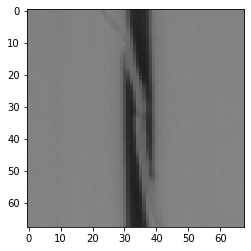

In [21]:
img_path = img_dir + df['file'][11]
lab_img = skimage.io.MultiImage(img_path)[0]
plt.imshow(lab_img)

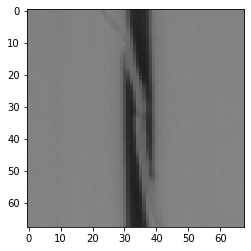

In [22]:
# median = cv2.medianBlur(lab_img, 1)
img_blur = cv2.GaussianBlur(lab_img, (1,1), 0 )
plt.imshow(img_blur)

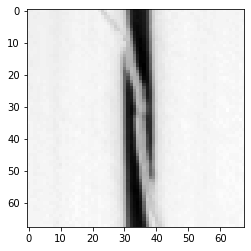

In [25]:
norm_image = np.zeros((68, 68,3))
plt.imshow(cv2.normalize(lab_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
from tqdm.notebook import tqdm
import skimage.io
import albumentations as albu
import tensorflow as tf

img_dir = '/home/workspace/data/.train/.task153/data/train/'
test_dir = '/home/workspace/data/.train/.task153/data/test/'
df = pd.read_csv(img_dir+'train.csv',names=['file','tile','label'],sep=',',skiprows=1)
test_df = pd.read_csv(test_dir+'test.csv',names=['file','tile','label'],sep=',',skiprows=1)
#image_file_list = glob(task_dir+ '/**/*.tif', recursive=True)

normal_img_len = len(df[df['label'] == 0]['file'])
normal_df = df[df['label'] == 0]
normal_df.reset_index(inplace=True, drop=False)

crack_img_len = len(df[df['label'] == 1]['file'])
crack_df = df[df['label'] == 1]
crack_df.reset_index(inplace=True, drop=False)

print(f'normal image : {normal_img_len}')
print(f'crack image : {crack_img_len}')

"""
    sz : 타일의 사이즈
    N : 타일의 갯수
    SZ * 루트N = 이미지 사이즈이어야 함
    ex) 17 * 4 = 68(이미지 사이즈)

"""
sz = 4
N = 17*17

def tile(img):
    result = []
    shape = img.shape
    pad0,pad1 = (sz - shape[0]%sz)%sz, (sz - shape[1]%sz)%sz
    img = np.pad(img,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2],[0,0]],
                constant_values=255)
    img = img.reshape(img.shape[0]//sz,sz,img.shape[1]//sz,sz,3)
    img = img.transpose(0,2,1,3,4).reshape(-1,sz,sz,3)
    if len(img) < N:
        img = np.pad(img,[[0,N-len(img)],[0,0],[0,0],[0,0]],constant_values=255)
#     idxs = np.argsort(img.reshape(img.shape[0],-1).sum(-1))[:N]
#     img = img[idxs]
    for i in range(len(img)):
        result.append({'img':img[i], 'idx':i})
    return result

def check_black(img):

    gray_image = img.copy()
#     gray_image = gray_image.astype(np.int8)
    gray_ravel = gray_image.ravel()
    # plt.hist(gray_ravel, 256, [0,255], color='black')
    # plt.show()

    up = 0
    down = 0
    for val in gray_ravel:
        if val <= 50:
            down += 1
        else:
            up += 1
    # print(up, down)
    
    #검은영역이 더 많을 경우 영역 제거 - 255로 변환
    if up <= down:
        thresholds = (gray_image[:,:] <= 50)

        gray_image[thresholds] = 254
        img = gray_image
    
        # plt.imshow(gray_image)
        # plt.show()
        # non_255 = gray_ravel[gray_ravel != 255]
        # plt.hist(non_255, 256, [0,255], color='black')
        # plt.show()
    return img

def preprocessing(image):
    tmp_tiles = []
    #이미지 타일화 및 검은영역 하얀색으로 변환
    tiles = tile(image)
    for t in tiles:
        img,idx = t['img'],t['idx']
        tmp_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = check_black(tmp_img)
        tmp_tiles.append(img)

    # all_tile = np.hstack(tmp_tiles)
    # plt.imshow(all_tile)

    #이미지 다시 합치기
    for i in range(17):
        start = i*17
        comp_img_2 = tmp_tiles[start]
        for j in range(1,17):
            comp_img_2 = cv2.hconcat([comp_img_2,tmp_tiles[start + j]])
        if i == 0:
            comp_img = comp_img_2.copy()
        else:
            comp_img = cv2.vconcat([comp_img,comp_img_2])
    # plt.imshow(comp_img)
    # plt.show()
    
    #GRAY to RGB
    result_image = cv2.merge([comp_img,comp_img,comp_img])
    return result_image

# #test data trans
# test_dir =  '/home/workspace/data/.train/.task153/data/test/'
# save_dir = 'trans_test_data/'
# test_df = pd.read_csv(test_dir+'test.csv',names=['file','tile','label'],sep=',',skiprows=1)
# for i in tqdm(range(len(test_df))):
#     file_name = test_df['file'][i]
# #     print(img_dir + file_name)
#     img = skimage.io.MultiImage(img_dir + file_name)[0]
#     result_img = preprocessing(img)
#     cv2.imwrite(save_dir+str(i)+'.jpg', result_img)


# #train data trans
# img_dir = '/home/workspace/data/.train/.task153/data/train/'
# save_dir = 'trans_data/'
# for i in tqdm(range(len(df))):
#     file_name = df['file'][i]
# #     print(img_dir + file_name)
#     img = skimage.io.MultiImage(img_dir + file_name)[0]
#     result_img = preprocessing(img)
#     cv2.imwrite(save_dir+str(i)+'.jpg', result_img)

    

crack_df

img_dir+img_name

#크랙 타일
rows = 10
cols = 10
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
# fig.tight_layout()
i = 1
 
for index in range(50):
    img_name = crack_df['file'][index]
    img = skimage.io.MultiImage(img_dir+img_name)[0]
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img, aspect="auto")
    ax.set_xlabel(img_name)
#     ax.set_xticks([]), ax.set_yticks([])
    i += 1
#     median = cv2.medianBlur(img, 3)
    img_blur = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img_blur, aspect="auto")
    ax.set_xlabel(img_name)
    i += 1
plt.show()

# 정상 타일
i = 1
rows = 5
cols = 10
fig2, axes2 = plt.subplots(rows, cols, figsize=(20, 20))
for index in range(50):
    img_name = normal_df['file'][index]
    img = skimage.io.MultiImage(img_dir+img_name)[0]
    ax = fig2.add_subplot(rows, cols, i)
    ax.imshow(img, aspect="auto")
    ax.set_xlabel(img_name)
#     ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.show()

# 테스트 파일 타일
i = 1
rows = 5
cols = 10
fig2, axes2 = plt.subplots(rows, cols, figsize=(20, 20))
for index in range(50):
    img_name = test_df['file'][index]
    img = skimage.io.MultiImage(test_dir+img_name)[0]
    ax = fig2.add_subplot(rows, cols, i)
    ax.imshow(img, aspect="auto")
#     ax.set_xlabel(img_name)
#     ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.show()

lab_img

img_path = img_dir + df['file'][11]
lab_img = skimage.io.MultiImage(img_path)[0]
plt.imshow(lab_img)

# median = cv2.medianBlur(lab_img, 1)
img_blur = cv2.GaussianBlur(lab_img, (1,1), 0 )
plt.imshow(img_blur)

norm_image = np.zeros((68, 68,3))
plt.imshow(cv2.normalize(lab_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F))